# Text Sentiment Analysis #

In [4]:
%matplotlib notebook
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

import pickle

import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter


In [2]:
data_file = 'text_emotion.csv'
data = pd.read_csv(data_file)

In [3]:

data.describe(include='all')

,tweet_id,sentiment,author,content
count,4.000000e+04,40000,40000,40000
unique,NaN,13,33871,39827
top,NaN,neutral,MissxMarisa,I just received a mothers day card from my lov...
freq,NaN,8638,23,14
mean,1.845184e+09,NaN,NaN,NaN
std,1.188579e+08,NaN,NaN,NaN
min,1.693956e+09,NaN,NaN,NaN
25%,1.751431e+09,NaN,NaN,NaN
50%,1.855443e+09,NaN,NaN,NaN
75%,1.962781e+09,NaN,NaN,NaN


In [5]:
data.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

<IPython.core.display.Javascript object>


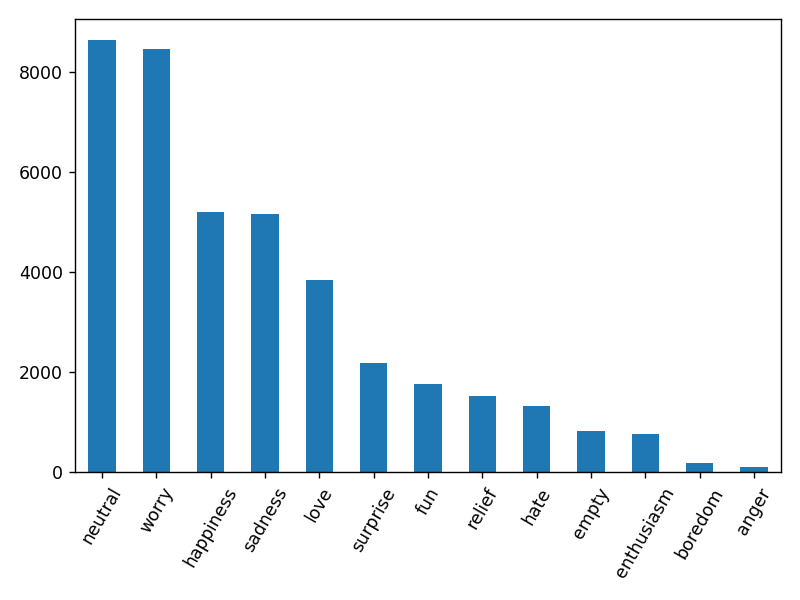

<AxesSubplot:>

In [6]:
data['sentiment'].value_counts().plot(kind='bar', rot=60)

In [7]:
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [ ]:
# look at distribution of most common words
counter = Counter()
for _, row in data.iterrows():
    counter.update(row['clean_content'].split())
counts = pd.DataFrame(counter.most_common(), columns=['word', 'count'])
counts['cumulative'] = counts['count'].cumsum() / counts['count'].sum()

counts.plot(y='cumulative', logx=True, grid=True)
plt.show()

In [ ]:
# make vocabulary lookup from top 95% of most common words
cutoff = .95
vocab = dict()
for idx, row in counts.iterrows():
    if row['cumulative'] > cutoff:
        break
    vocab[row['word']] = idx

# check vocab length
len(vocab)

In [12]:
# encode label values
labels = {value: idx for idx, value in enumerate(data['sentiment'].unique())}
labels

{'empty': 0,
 'sadness': 1,
 'enthusiasm': 2,
 'neutral': 3,
 'worry': 4,
 'surprise': 5,
 'love': 6,
 'fun': 7,
 'hate': 8,
 'happiness': 9,
 'boredom': 10,
 'relief': 11,
 'anger': 12}

In [13]:
data['label'] = data['sentiment'].apply(lambda x: labels[x])
data.head()

,tweet_id,sentiment,author,content,label
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,0
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,1
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,1
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,2
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,3


In [ ]:
# save processed file
processed_datafile = 'processed_emotions.pkl'

processed_data = data[['label', 'encoded_content']]
processed_data.columns = ['label', 'sequence']
processed_data.to_pickle(processed_datafile)
processed_data.head()

In [ ]:
# save data params
data_params_file = 'data_params.pkl'

class_lookup = {v: k for k, v in labels.items()}
params = dict(max_sequence_length=max_sequence_length, vocab=vocab, labels=class_lookup)

with open(data_params_file, 'wb') as f:
    pickle.dump(params, f)